In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [137]:
ruta_archivo = 'D:/Esteban/Documentos/personales/Proyectos/Propios/PruebasTenicas/Truora_AnalistaIdentidad/BD2.xlsx'


In [138]:
df = pd.read_excel(ruta_archivo)
df_fraude = df[df['identity_status'] == 'not_found']
# dataframe con los registros que no san SIN MORA o Nan del campo financial_status
df_financiero = df[(df['financial_status'] != 'SIN MORA') & (df['financial_status'].notnull())]
#Dataframe con los registros mayores a 0.8 de sin Mora 
df_financiero_score = df_financiero[df_financiero['score'] >= 0.8]
#Dataframe con registros que en keywords_criminal no esten vacios
df_criminal = df[df['keywords_criminal'].notnull()]
#Dataframe con usuarios con score mayor a 0.8 y keywords_criminal no vacios
df_criminal_score = df_criminal[df_criminal['score'] >= 0.8]

total_criminal = df[df['keywords_criminal'].notnull()]['keywords_criminal'].count()
df_criminal_financiero = df[(df['score_criminal_background'] < 0.5) & (df['score_financial_background'] > 0.8)]

In [139]:
color = ['#05052d','#4900ff','#01d774' ] 

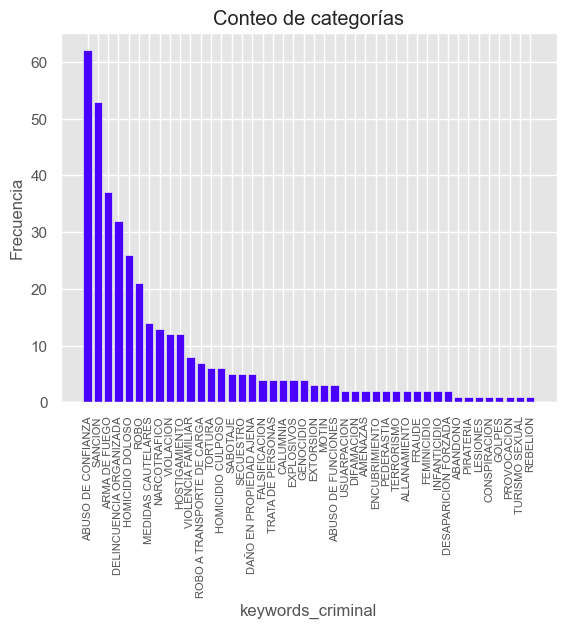

In [159]:


# Obtener el conteo de cada categoría
category_counts = df_criminal['keywords_criminal'].value_counts()

mpl.style.use('ggplot')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color[1])

plt.bar(category_counts.index, category_counts.values)

plt.title('Conteo de categorías')
plt.xlabel('keywords_criminal')
plt.ylabel('Frecuencia')

plt.xticks(rotation=90, fontsize=8)

plt.show()

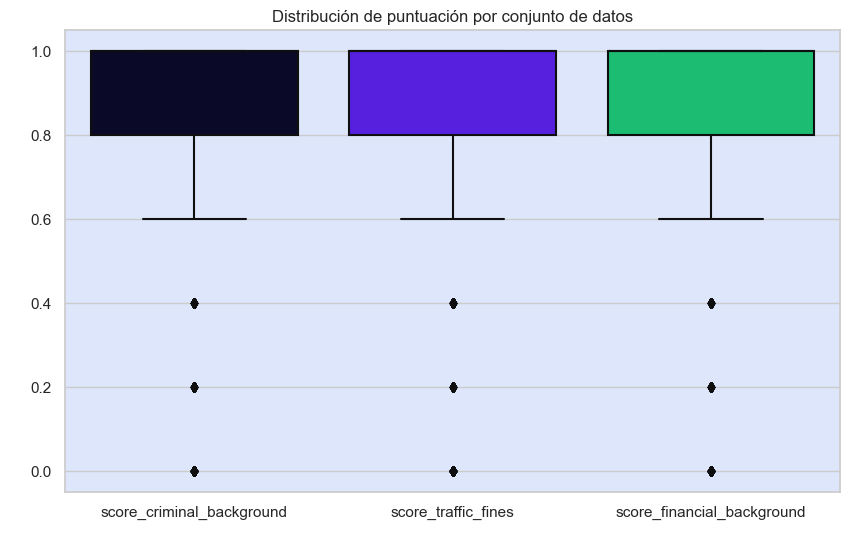

In [141]:
#grafico de distribución de puntuación por conjunto de datos (Criminal Background, Traffic Fines, Financial Background)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.boxplot(x="variable", y="value", data=pd.melt(df[['score_criminal_background', 'score_traffic_fines', 'score_financial_background']]), palette=color)

plt.title('Distribución de puntuación por conjunto de datos')
plt.xlabel('Conjunto de datos', color='white')
plt.ylabel('Puntuación', color='white')

plt.gca().set_facecolor('#DDE6FB')


plt.show()



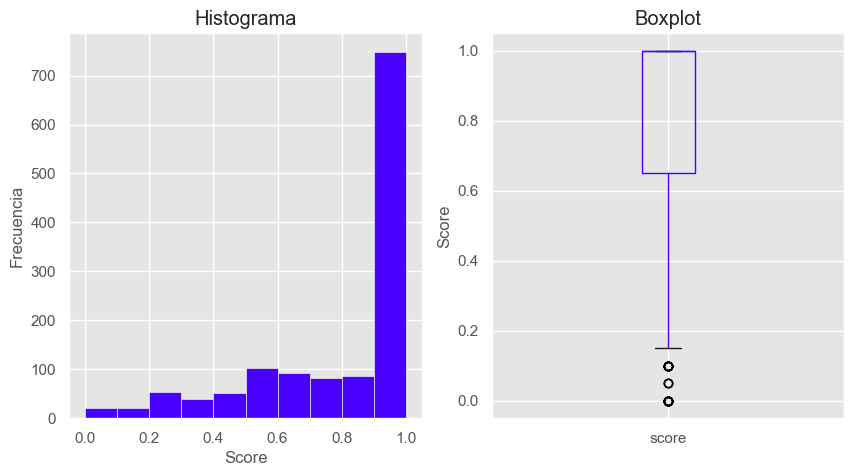

In [161]:
#Histograma y Boxplot del score con sus respectivas etiquetas

mpl.style.use('ggplot')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color[1:2])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df['score'].hist(ax=ax[0])
ax[0].set_title('Histograma')
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Frecuencia')
df.boxplot(column='score', ax=ax[1])
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Score')

plt.show()

* La mayoría de los gigsters evaluados tienen puntuaciones altas, lo que indica que la mayoría no tienen antecedentes penales, multas de tránsito o problemas financieros.
* Los gigsters con puntuaciones más bajas (0.0, 0.05) podrían requerir una verificación adicional para detectar posibles problemas de identidad o antecedentes penales.
* Es importante abordar y corregir los problemas de precisión decimal en las puntuaciones para garantizar una representación más precisa y coherente de los datos.

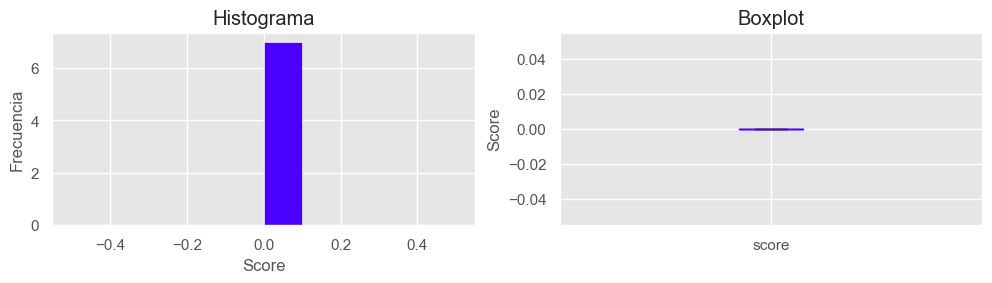

In [162]:
#Dataframe de los usuario que tiene not_found en identity_status 

mpl.style.use('ggplot')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color[1:2])

fig, ax = plt.subplots(1,2, figsize=(12,2.5))
df_fraude['score'].hist(ax=ax[0])
ax[0].set_title('Histograma')
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Frecuencia')
df_fraude.boxplot(column='score', ax=ax[1])
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Score')
plt.show()




* la puntuación global es 0.0 y los campos faltantes (NaN) en todos los conjuntos de datos, esto podría indicar un posible fraude o la falta de datos completos para ese usuario en particular.
* Se debe consultar fuentes adicionales o verificar la calidad y confiabilidad de los datos para confirmar si se trata de un caso de posible fraude.

In [145]:
#Número total de gigster con  no_found con posible fraude
total = df_fraude['identity_status'].count()
porcentaje = (total/df['identity_status'].count())*100
print('El número total de gigster con posible fraude es: ', total)
print('El porcentaje de gigster con posible fraude es: ', porcentaje)


El número total de gigster con posible fraude es:  7
El porcentaje de gigster con posible fraude es:  0.5384615384615384


* Criterio de aceptación: Gigsters con una puntuación global igual o mayor a 0.8.
* Criterio de rechazo: Gigsters con una puntuación global inferior a 0.8.

In [146]:
#1. total de gigster registrados en la base de datos
total_registros = df['identity_status'].count()
# gigster registrados con una puntuación global igual o mayor a 0.8. de score aceptado
total_score = df[df['score'] >= 0.8]['score'].count()
#Número de gigster registrados con una puntuación global inferior a 0.8. de score rechazado
total_score_inferior = df[df['score'] < 0.8]['score'].count()


In [147]:
#Porcentaje Global de gigster registrados aceptados 
porcentaje_aceptado = (total_score/total_registros)*100
#Porcentaje Global de registros rechazados 
porcentaje_rechazado = (total_score_inferior/total_registros)*100
print('La tasa Global de aceptación es: ', porcentaje_aceptado)
print('La tasa Global de rechazo es: ', porcentaje_rechazado)

La tasa Global de aceptación es:  64.23076923076924
La tasa Global de rechazo es:  35.76923076923077


In [148]:


#cantidad de usuarios con score mayor a 0.8
total_score_financiero = df_financiero[df_financiero['score'] >= 0.8]['score'].count()
print('El total de registros con score mayor a 0.8 es: ', total_score_financiero)
porcentaje_score_financiero = (total_score_financiero/total_score)*100
print('Porcentaje de aceptados con score mayor a 0.8 con  Mora: ', porcentaje_score_financiero)

#cantidad de usuarios con score Menor a 0.8
total_score_financiero_inferior = df_financiero[df_financiero['score'] < 0.8]['score'].count()
print('El total de registros con score menor a 0.8 es: ', total_score_financiero_inferior)
porcentaje_score_financiero_inferior = (total_score_financiero_inferior/total_score_inferior)*100
print('Porcentaje de rechazo  con score menos a 0.8 con Mora: ', porcentaje_score_financiero_inferior)

El total de registros con score mayor a 0.8 es:  69
Porcentaje de aceptados con score mayor a 0.8 con  Mora:  8.263473053892216
El total de registros con score menor a 0.8 es:  306
Porcentaje de rechazo  con score menos a 0.8 con Mora:  65.80645161290323


###  Aceptados pero con keywords_criminal

In [149]:
#usuarios con score mayor a 0.8
total_score_criminal = df_criminal[df_criminal['score'] >= 0.8]['score'].count()
print('Total de registros con score mayor a 0.8 es: ', total_score_criminal)


Total de registros con score mayor a 0.8 es:  54


In [150]:
#cuantos registros tienen score_criminal_background  menor a 0.5 de df_criminal_score
total_score_criminal_inferior = df_criminal_score[df_criminal_score['score_criminal_background'] < 0.5]['score_criminal_background'].count()
print('Total de registros con score_criminal_background menor a 0.5 es: ', total_score_criminal_inferior)
#promedio de score_criminal_background de df_criminal_score con score mayor a 0.8
promedio_score_criminal = df_criminal_score['score_criminal_background'].mean()
print('El promedio de score_criminal_background es: ', promedio_score_criminal)


Total de registros con score_criminal_background menor a 0.5 es:  0
El promedio de score_criminal_background es:  0.7888888888888885


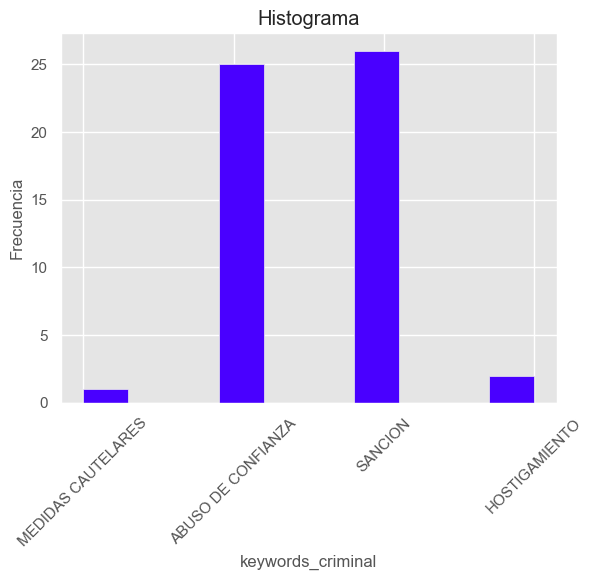

In [163]:
#Histograma de los keywords_criminal  que tienen score mayor a 0.8
mpl.style.use('ggplot')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color[1:2])

plt.hist(df_criminal_score['keywords_criminal'])

plt.title('Histograma')
plt.xlabel('keywords_criminal')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)

plt.show()



In [153]:
df['keywords_criminal'].value_counts()


keywords_criminal
ABUSO DE CONFIANZA            62
SANCION                       53
ARMA DE FUEGO                 37
DELINCUENCIA ORGANIZADA       32
HOMICIDIO DOLOSO              26
ROBO                          21
MEDIDAS CAUTELARES            14
NARCOTRAFICO                  13
VIOLACION                     12
HOSTIGAMIENTO                 12
VIOLENCIA FAMILIAR             8
ROBO A TRANSPORTE DE CARGA     7
TORTURA                        6
HOMICIDIO CULPOSO              6
SABOTAJE                       5
SECUESTRO                      5
DAÑO EN PROPIEDAD AJENA        5
FALSIFICACION                  4
TRATA DE PERSONAS              4
CALUMNIA                       4
EXPLOSIVOS                     4
GENOCIDIO                      4
EXTORSION                      3
MOTIN                          3
ABUSO DE FUNCIONES             3
USUARPACION                    2
DIFAMACION                     2
AMENAZAS                       2
ENCUBRIMIENTO                  2
PEDERASTIA               

In [155]:
#Registros con keywords_criminal no vacio
print('Total de registros con keywords_criminal no vacio: ', total_criminal)


Total de registros con keywords_criminal no vacio:  383


In [157]:
#Maximo score de usuario con core_criminal_background inferior a 0.5 y score_financial_background mayor a 0.8
maximo = df_criminal_financiero['score'].max()
print('El valor maximo de score en df_criminal_financiero es: ', maximo)


El valor maximo de score en df_criminal_financiero es:  0.7


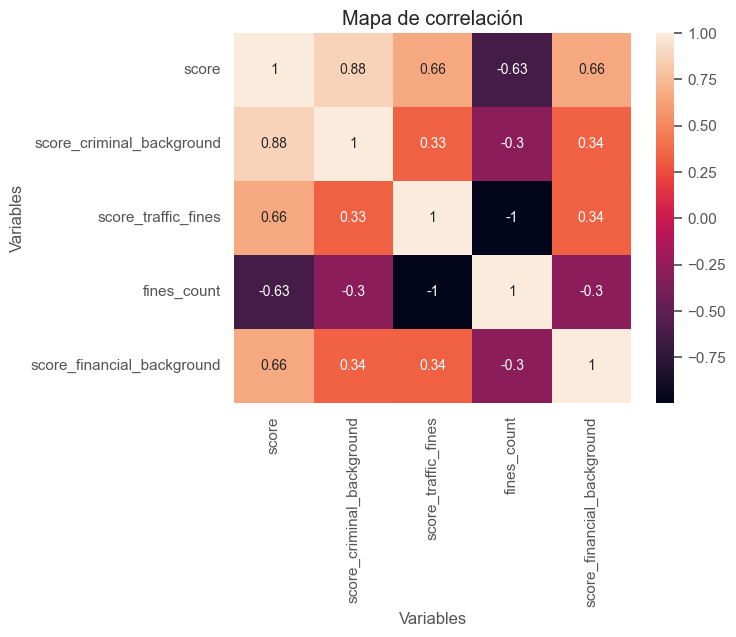

In [164]:
#mapa de correclación por calor
corr = df[['score', 'score_criminal_background', 'score_traffic_fines', 'fines_count',  'score_financial_background', ]].corr()
sns.heatmap(corr, annot=True)
plt.title('Mapa de correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()
